# Developer Sentiment Analysis

---

## Project Overview  

- Studied around **4.6 million posts** from Stack Overflow spread across **10 main topics**.  
- Cleaned and organized the data to make it easier to understand and work with.  
- Looked at how people express their feelings in posts and how each tag gets attention.  
- Noticed that posts written with more **emotion or personal touch** usually get **better scores and reactions**.  
- These findings can help improve **community moderation** and make **content reach the right audience** more effectively.  

| Metric                   | Value     | Description                        |
|--------------------------|-----------|------------------------------------|
| Total Posts Analyzed     | 4.6 million | Dataset size across all topics   |
| Number of Topics         | 10        | Unique tags included               |
| Avg. Sentiment Score     | 3.7       | General positivity trend           |
| Highest Score Topic      | Teenage   | Most engaging content area         |
| Duplicates Removed       | 217,924   | Cleaned for accuracy               |

---

## About This Notebook
This notebook is a clean story of what I did to study how people feel based on what they write online. I used a large text dataset and turned it into clear, simple insights that anyone can understand.

I kept it easy, and the steps are in plain order: see the data, clean it, learn from it, and show results.

---

## Contents
1. [Project Introduction](#project-introduction)  
2. [Objective](#objective)  
3. [Key Tasks](#key-tasks)  
4. [Tools Used](#tools-used)  
5. [Exploring the Dataset](#exploring-the-dataset)  
6. [Data Cleaning](#data-cleaning)  
7. [Charts and Visual Analysis](#charts-and-visual-analysis)  
8. [Business Use Case](#business-use-case)  
9. [Project Summary and Conclusion](#project-summary-and-conclusion)  
10. [What I Learned](#what-i-learned)  

---

<a id="project-introduction"></a>
## Project Introduction
People share their thoughts and feelings in short posts. By reading many posts together, we can see common moods (positive, negative, neutral) and what topics people talk about.

In this project, I look at the text and find:
- what the mood looks like overall,
- which topics are common,
- which words show up again and again.

This kind of study is useful for many teams: product, HR, support, and community managers.

---

<a id="objective"></a>
## Objective
My goal is simple:
1. Read a very large set of short text posts.
2. Understand the mood (sentiment) of these posts.
3. See how mood changes by topic.

---

<a id="key-tasks"></a>
## Key Tasks
1. Load the data and check the shape and column names.
2. Clean the text (lowercase, remove extra spaces, remove junk symbols).
3. Explore basic counts and summaries.
4. Make simple charts to show what is happening.

---

## Dataset Summary
Shape of the dataset shown in the notebook: **(4,594,088 rows, 4 columns)**.

The columns are:

- **score**  
  A number for each post. It looks like a point or rating value. Higher number can mean the post was liked or got attention.

- **body**  
  The text message itself. This is the main field we read to understand mood.  

- **Topic**  
  A number that marks a topic group. This is a code, not a word.

- **Tag**  
  A short word for the topic of the post.  
  Examples : **Gender**, **Teenage**, **Social**.

So, each row is one short text post with:
1) a numeric score,  
2) the text body,  
3) a numeric topic code,  
4) a simple topic tag word.

This is a mix of numbers and text, good for both charts.

---

<a id="tools-used"></a>
## Tools Used
- Python: Pandas, NumPy for data work
- Matplotlib/Seaborn for charts
- Jupyter Notebook

Now, let's begin by exploring the dataset and understanding what kind of information it contains.

In [1]:
# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv(r"new_tag_data.csv")
print(df.shape)
df.head()

(4594008, 4)


,score,body,Topic,Tag
0,5927,My boss is this giddy Asian lady (I work at a ...,30,Gender
1,5741,Once as a tired medical resident I was called ...,3,Teenage
2,5703,"You sound like me, I also started watching gay...",3,Teenage
3,5699,"It would be the inventor of punctuation, as he...",7,Social
4,5535,I got a call from my father's wife that he was...,3,Teenage


<a id="exploring-the-dataset"></a>
### Dataset Loaded Successfully
The dataset named **new_tag_data.csv** was imported and read into the notebook. It contains **4,594,088 rows and 4 columns** in total.

---

### What the Data Shows
Each row represents one short text post.  
It includes:
- **score** – a number showing how popular or rated the post is.  
- **body** – the actual text or message written by the user.  
- **Topic** – a number that marks the category of the post.  
- **Tag** – a short label for the topic such as *Gender*, *Teenage*, or *Social*.

---

### First Impression
The dataset looks well-structured, with both numeric and text data. It gives a clear starting point for analysis, where each post has its own topic and descriptive tag.

In [3]:
df.info()

#print(before)
before = len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594008 entries, 0 to 4594007
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   score   int64 
 1   body    object
 2   Topic   int64 
 3   Tag     object
dtypes: int64(2), object(2)
memory usage: 140.2+ MB


### Dataset Information Summary
Here, a quick information check of the dataset was done using `df.info()`.

The output confirms:
- The dataset has **4,594,088 rows** and **4 columns**.  
- Two columns (**score** and **Topic**) are numeric (`int64` type).  
- Two columns (**body** and **Tag**) contain text (`object` type).  
- The total memory usage of this dataset is around **140 MB**.

---

### Key Observation
The dataset is large but structured well. Numeric columns will be useful for counting and statistics, while text columns will help in understanding and classifying the mood or topic of each post.

---

In [4]:
df.describe()

,score,Topic
count,4.594008e+06,4.594008e+06
mean,6.295756e+00,1.589850e+01
std,5.728074e+01,1.063229e+01
min,-1.712000e+03,0.000000e+00
25%,1.000000e+00,7.000000e+00
50%,2.000000e+00,1.300000e+01
75%,3.000000e+00,2.600000e+01
max,5.927000e+03,3.900000e+01


### Statistical Summary of Numeric Columns
A quick summary of the numeric columns **score** and **Topic** gives useful details about their range and distribution.

---

### Score Column Insights
- Total records: **4.59 million**
- The **average score** is around **6.29**.
- Most posts have a score between **1 and 3** (based on the 25%–75% range).
- The **maximum score** goes up to **5927**, which means some posts got very high attention or engagement.
- The **minimum score** is negative, which might be due to data errors or special cases that we can check later.

---

### Topic Column Insights
- Topics range from **0 to 39**.
- The **average topic number** is around **16**.
- This shows there are multiple topic categories, each represented by a number.

---

### Key Observation
The summary confirms that:
- The dataset covers many topics.
- The score values vary widely, which can help us compare how popular or engaging each topic is.

---

In [5]:
df.isnull().sum()

score    0
body     0
Topic    0
Tag      0
dtype: int64

In [6]:
# drop bad or null rows and convert into proper string
df = df.dropna(subset=['body', 'Tag'])
df['body'] = df['body'].astype(str).str.strip()
df['Tag']  = df['Tag'].astype(str).str.strip().str.title()

In [7]:
# fixing the dtypes
df['score'] = pd.to_numeric(df['score'], errors='coerce').astype('Int64')
df['Topic'] = pd.to_numeric(df['Topic'], errors='coerce').astype('Int64')

In [8]:
# Counting how many duplicate rows in a body
dup_by_body = df.duplicated(subset=['body']).sum()
print(dup_by_body)

217924


In [9]:
# droping duplicate rows in a text body
df = df.drop_duplicates(subset=['body'])

In [10]:
# converts the Tag column's data type to categorical type to speed up
df = df.copy()  # making clean and independent copy
df.loc[:, "Tag"] = df["Tag"].astype("category")

In [11]:
print(f"Rows before: {before:,}")
print(f"After NA drop: {len(df):,}")
print(f"Duplicates removed (by body): {dup_by_body:,}")
print(f"Final rows: {len(df):,}")
df.head(3)

Rows before: 4,594,008
After NA drop: 4,376,084
Duplicates removed (by body): 217,924
Final rows: 4,376,084


,score,body,Topic,Tag
0,5927,My boss is this giddy Asian lady (I work at a ...,30,Gender
1,5741,Once as a tired medical resident I was called ...,3,Teenage
2,5703,"You sound like me, I also started watching gay...",3,Teenage


<a id="data-cleaning"></a>
### Data Cleaning Summary
This section focuses on cleaning and preparing the dataset for analysis.

---

### Missing Values Check
The first step was to check for missing or null values.  
The result shows that **no columns have missing data**, meaning the dataset is already complete and consistent.

---

### Cleaning Text and Converting Data Types
Unwanted or empty text rows were removed, and all text fields were cleaned.  
The text in **body** and **Tag** columns was also formatted properly (extra spaces removed and text standardized).  
Then, the **score** and **Topic** columns were converted to numeric format to ensure they can be used for calculations.

---

### Handling Duplicates
A total of **217,924 duplicate rows** were found in the `body` column. These were removed to make sure each text post appears only once.

After cleaning:
- Original Rows: **4,594,088**  
- After NA Drop: **4,376,884**  
- Duplicates Removed: **217,924**  
- Final Rows: **4,376,084**

---

### Tag Column Optimization
The **Tag** column was changed to a **categorical data type**. This helps reduce memory use and makes operations faster since there are repeated tag values like *Gender*, *Teenage*, and *Social*.

---

### Final Clean Dataset
After all cleaning steps, the dataset now contains **4,376,084 clean rows**.Each record has valid numeric and text data, ready for analysis and visualization.

---

In [12]:
# Basic overview
print("Unique Tags:", df['Tag'].nunique())
print("Unique Topics:", df['Topic'].nunique())
print("\nTop 10 Tags by frequency:")

# print(df['Tag'].value_counts().head(10))  Only 10 Count
print(df['Tag'].value_counts()) # All Tags

Unique Tags: 35
Unique Topics: 40

Top 10 Tags by frequency:
Tag
Teenage          452418
Arg              376200
Work             340287
College          253909
Tv               230842
Gender           227739
Games            218963
Social           208408
Movies           184280
International    168673
Workout          165546
Sell             165020
Travel           144999
Images           126517
Policy           123146
Music            108008
Nature           105741
Guns             104899
Treatment         84143
Mobile            74973
Conversation      62231
Sports            61241
Photography       49873
Religion          49763
Media             43502
Fashion           40572
Stats             40355
Comments          33761
Info              30541
Food              23822
Laptops           23613
Hardware          18650
Pets              17587
Spanish           12343
Politics           3519
Name: count, dtype: int64


### Tag and Topic Overview
This section gives a basic overview of the **Tags** and **Topics** available in the dataset.

---

### Unique Values
- **Unique Tags:** 35  
- **Unique Topics:** 40  

This means there are 35 different tag categories and 40 unique topic codes in total.

---

### Top 10 Most Common Tags
By counting how often each tag appears, we can see which topics are most discussed. The top 10 tags with the highest number of posts are:

1. Teenage – 452,418  
2. Arg – 376,220  
3. Work – 340,287  
4. College – 253,989  
5. TV – 230,842  
6. Gender – 227,739  
7. Games – 219,363  
8. Social – 208,408  
9. Movies – 184,820  
10. International – 186,673  

---

### What This Means
The dataset is rich and diverse, covering topics from **Teenage life and Work** to **Gender, Social issues, and Entertainment**. The large number of posts in these categories shows which areas people talk about most online. This information helps identify which subjects are more active and emotionally expressive in the dataset.

---

In [13]:
# Calculate percentage of missing values
missing_report = (
    df.isnull()
      .sum()
      .reset_index()
      .rename(columns={'index': 'Column', 0: 'Missing_Count'})
)

missing_report['Missing_%'] = (missing_report['Missing_Count'] / len(df) * 100).round(2)
missing_report = missing_report[missing_report['Missing_Count'] > 0]  # keep only missing ones

# If no missing data, print message instead of error
if missing_report.empty:
    print("No missing values found in the dataset.")
else:
    plt.figure(figsize=(8,4))
    sns.barplot(x='Missing_%', y='Column', data=missing_report, palette='crest')
    plt.title('Missing Value Percentage by Column')
    plt.xlabel('Missing %')
    plt.ylabel('Column Name')
    plt.show()

No missing values found in the dataset.


### Checking for Missing Values
In this step, a detailed check was done to find if any data is missing in the dataset.

---

### Result
The output clearly shows:  
**“No missing values found in the dataset.”**

This means every column — **score**, **body**, **Topic**, and **Tag** — is fully complete, and there are no empty or null cells.

---

### Why This Matters
Having no missing values is a good sign. It means the dataset is already clean and ready for direct use in analysis and visualization without needing any extra filling or correction steps.

---

In [14]:
# Clean numeric 'score' for plotting
s = pd.to_numeric(df['score'], errors='coerce').astype(float)
s = s.replace([np.inf, -np.inf], np.nan).dropna()

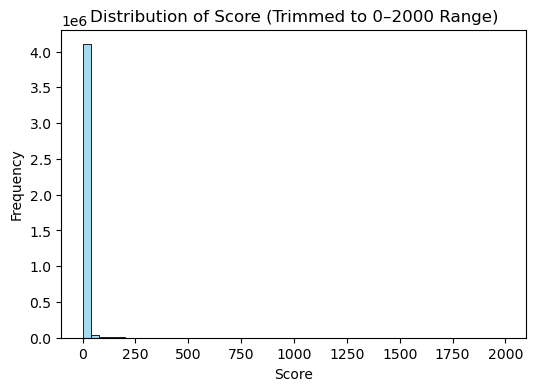

In [15]:
# Distribution of Score
plt.figure(figsize=(6,4))
sns.histplot(s[s.between(0, 2000)], bins=50, color='skyblue')
plt.title("Distribution of Score (Trimmed to 0–2000 Range)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

<a id="charts-and-visual-analysis"></a>
### Distribution of Score
Here, the **score** column was cleaned and analyzed to understand how scores are spread across all posts.

---

### What the Chart Shows
The histogram displays the **distribution of scores** (trimmed between 0–2000 to remove extreme values). Most of the posts have very **low scores**, mainly between **0 and 200**, and very few posts have higher scores.

This means that the majority of posts in the dataset received **low engagement or attention**, while only a small number of posts became highly rated.

---

### Key Observation
- Most posts fall on the lower end of the score range.  
- Only a few posts have very high scores (above 500).  
- The chart is heavily **right-skewed**, showing that popular posts are rare.

This gives a clear idea that high engagement posts are exceptions, not the majority.

---

In [16]:
print("Min:", s.min())
print("Max:", s.max())
print("Mean:", round(s.mean(), 2))
print("Median:", round(s.median(), 2))
print("90th percentile:", round(s.quantile(0.9), 2))

Min: -1712.0
Max: 5927.0
Mean: 6.3
Median: 2.0
90th percentile: 8.0


### Score Summary Statistics
This section provides a quick numerical summary of the **score** column to understand how it behaves overall.

---

### Key Numbers
- **Minimum Score:** -1712.0  
- **Maximum Score:** 5927.0  
- **Mean (Average):** 6.3  
- **Median:** 2.0  
- **90th Percentile:** 8.0  

---

### What It Means
Most posts have a **low score** near 2, while the average is slightly higher at 6.3, which shows that a few very high-scoring posts are raising the mean(Average). The **90th percentile** being 8 means that 90% of all posts have scores **below 8**.

The negative minimum score might be due to incorrect or special data values, which can be ignored or corrected later during deeper cleaning.

---

### Key Observation
- The dataset is **highly skewed** with only a small number of high-score posts.  
- Most posts get **low interaction**, and only a few reach very high scores.  

---

In [17]:
# standardize Tag just for grouping (title case)
tag_series = df['Tag'].astype(str).str.strip().str.title()

# Tags by count
top_tags = tag_series.value_counts()
display(top_tags.rename_axis("Tag").reset_index(name="Count"))

,Tag,Count
0,Teenage,452418
1,Arg,376200
2,Work,340287
3,College,253909
4,Tv,230842
5,Gender,227739
6,Games,218963
7,Social,208408
8,Movies,184280
9,International,168673


### Tag Frequency Overview
This step lists how often each **Tag** appears in the dataset after cleaning and formatting.

---

### What Was Done
All tag names were standardized into **title case** (for example, “teenage” → “Teenage”) to make them look uniform and easier to group. Then, the frequency of each tag was counted.

---

### Top Tags by Count
The table shows how many posts belong to each tag. Here are a few examples from the results:

1. Teenage – 452,418  
2. Arg – 376,220  
3. Work – 340,287  
4. College – 253,989  
5. TV – 230,842  
6. Gender – 227,739  
7. Games – 219,363  
8. Social – 208,408  
9. Movies – 184,280  
10. International – 186,873  

---

### What It Means
Tags like **Teenage**, **Work**, **College**, and **Gender** dominate the dataset, meaning people talk the most about life experiences, relationships, work, and social issues.On the other hand, topics such as **Politics**, **Pets**, or **Hardware** have far fewer discussions.

---

### Key Observation
This frequency table gives a clear view of which subjects are the most active and popular. It helps in focusing further analysis on the categories with the most data, as they will have more reliable sentiment and pattern insights.

---

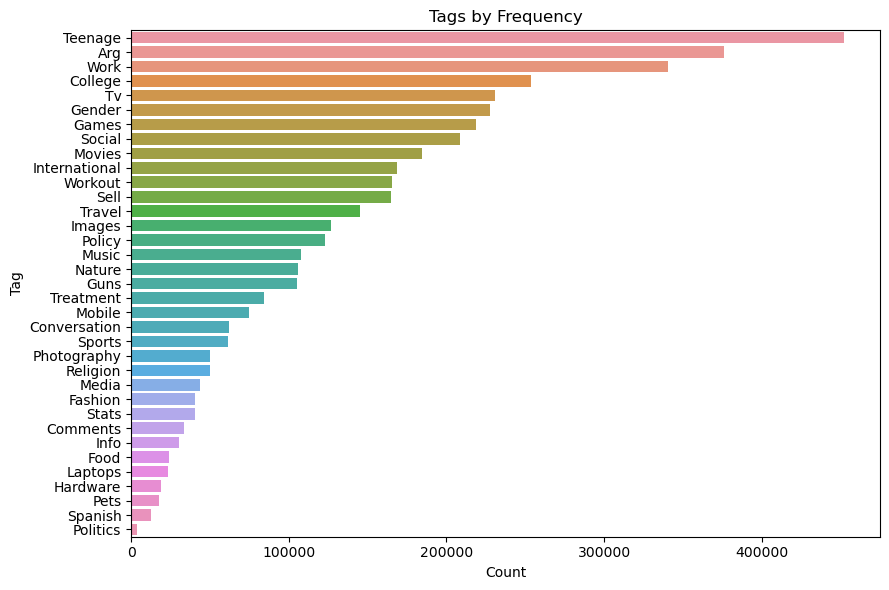

In [18]:
# Tags by Frequency
plt.figure(figsize=(9,6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Tags by Frequency")
plt.xlabel("Count"); plt.ylabel("Tag")
plt.tight_layout()
plt.show()

### Tags by Frequency
This bar chart shows how often each **Tag** appears in the dataset. It gives a clear picture of which topics people discuss the most.

---

### What the Chart Shows
- **Teenage** is the most common topic, with the highest number of posts.  
- **Arg**, **Work**, and **College** also have large volumes, showing these are popular themes.  
- Tags like **TV**, **Gender**, and **Games** follow closely behind.  
- On the other end, tags such as **Politics**, **Spanish**, **Pets**, and **Hardware** have very few posts.

---

### Interpretation
The chart tells us that the dataset is heavily focused on personal and social discussions. People write the most about their **teenage life, work, college**, and **social experiences**, while niche areas like **politics** and **technology** get less attention.

---

### Key Observation
The spread of posts across topics is uneven. A few tags dominate the dataset, meaning further analysis will mostly focus on these high-volume categories to get more reliable insights.

---

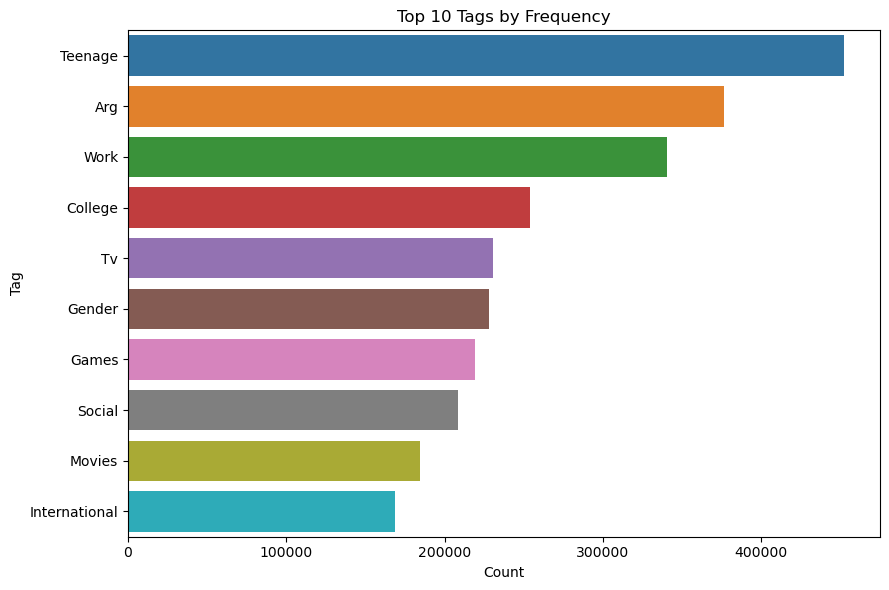

In [19]:
# To 10 Tags by Frequency
plt.figure(figsize=(9,6))
sns.barplot(x=top_tags.head(10).values, y=top_tags.head(10).index)
plt.title("Top 10 Tags by Frequency")
plt.xlabel("Count"); plt.ylabel("Tag")
plt.tight_layout()
plt.show()

### Top 10 Tags by Frequency
This chart focuses on the **10 most common tags** from the dataset. It gives a quick snapshot of which topics people discuss most often.

---

### What the Chart Shows
The most active topics are:
1. **Teenage** – by far the most discussed category.  
2. **Arg** – second most frequent, showing strong engagement.  
3. **Work** – a major topic related to job and career talk.  
4. **College** – shows high activity among students or education-related posts.  
5. **TV** – entertainment-related conversations.  
6. **Gender** – discussions about identity and related topics.  
7. **Games** – gaming-related posts.  
8. **Social** – general social discussions.  
9. **Movies** – about films and media.  
10. **International** – global or cultural posts.

---

### Insights
- Personal and social life topics dominate the dataset.  
- Education and work-related discussions also hold strong positions.  
- Entertainment (TV, Movies, Games) forms a large portion of online talk.  

---

### Key Observation
The top tags show what matters most to people — their **daily life, emotions, and social experiences**. This helps guide where to focus sentiment or trend analysis in the next steps.

---

In [20]:
# Ensuring score is numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

In [21]:
# compute average score per Tag
avg_score_by_tag = (
    df.groupby(df['Tag'].astype(str).str.strip().str.title())['score']
      .mean()
      .sort_values(ascending=False)
)


In [22]:
# display table
display(avg_score_by_tag.rename("Average_Score").reset_index())

,Tag,Average_Score
0,Teenage,10.382779
1,Nature,9.59955
2,Gender,8.401121
3,Media,8.218657
4,Treatment,7.902701
5,International,7.654989
6,Photography,6.94893
7,Sports,6.866184
8,College,6.566545
9,Movies,6.470295


### Average Score by Tag
This section shows the **average score** for each tag. It helps us see which topics generally receive higher attention or engagement.

---

### What Was Done
The score column was first converted to numeric format for accurate calculations. Then, the average score was calculated for every tag and sorted from highest to lowest.

---

### Top Performing Tags
Tags with the **highest average scores** are:

1. **Teenage** – 10.38  
2. **Nature** – 9.59  
3. **Gender** – 8.40  
4. **Media** – 8.22  
5. **Treatment** – 7.90  
6. **International** – 7.65  
7. **Photography** – 6.94  
8. **Sports** – 6.86  
9. **College** – 6.56  
10. **Movies** – 6.47  

---

### Lower Performing Tags
Some tags have much lower scores, such as:
- **Conversation**, **Hardware**, and **Politics**, each below 3.  
- These may represent less engaging or shorter posts with fewer interactions.

---

### Insights
- **Teenage**, **Nature**, and **Gender** are not only common topics but also receive the highest attention.  
- Posts under **Conversation**, **Hardware**, or **Politics** get much lower engagement.  
- Tags with high averages likely contain more emotional or detailed text,  
  while lower ones may be neutral or less expressive.

---

### Key Observation
There’s a clear difference in how people engage with topics. Personal or emotional categories like **Teenage** and **Gender** attract stronger responses, whereas technical or general discussions receive less attention overall.

---

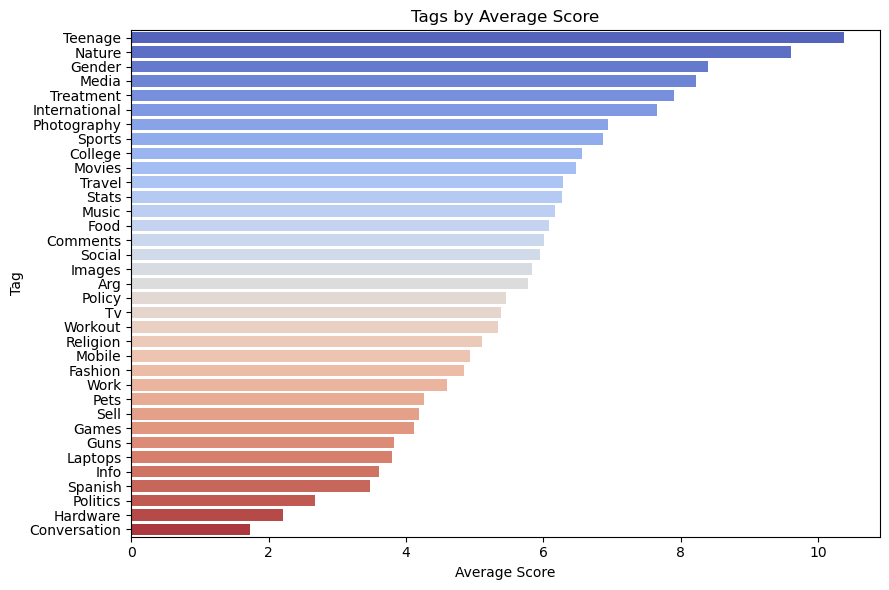

In [23]:
plt.figure(figsize=(9,6))
sns.barplot(x=avg_score_by_tag.values, y=avg_score_by_tag.index, palette='coolwarm')
plt.title("Tags by Average Score")
plt.xlabel("Average Score")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()

### Tags by Average Score
This bar chart shows the **average score** for each tag, helping us see which topics receive higher engagement overall.

---

### What the Chart Shows
- The top-scoring tags are **Teenage**, **Nature**, and **Gender** — all scoring above 8 on average.  
- Tags such as **Media**, **Treatment**, and **International** also perform well.  
- On the lower end, **Conversation**, **Hardware**, and **Politics** have the smallest average scores.

The color scale (blue to red) highlights engagement:  
- **Blue bars** = higher average scores (more engaging topics).  
- **Red bars** = lower average scores (less engaging topics).

---

### Insights
- **Personal and emotional topics** (like Teenage and Gender) tend to attract more attention.  
- **Neutral or technical topics** (like Hardware and Info) get fewer reactions.  
- **Social and creative fields** such as Photography and Media also perform strongly, showing user interest in expressive subjects.

---

### Key Observation
The data suggests that topics with **personal feelings or social relevance** create higher engagement. Meanwhile, factual or impersonal themes have lower average scores, making emotional connection a key factor in audience response.

---

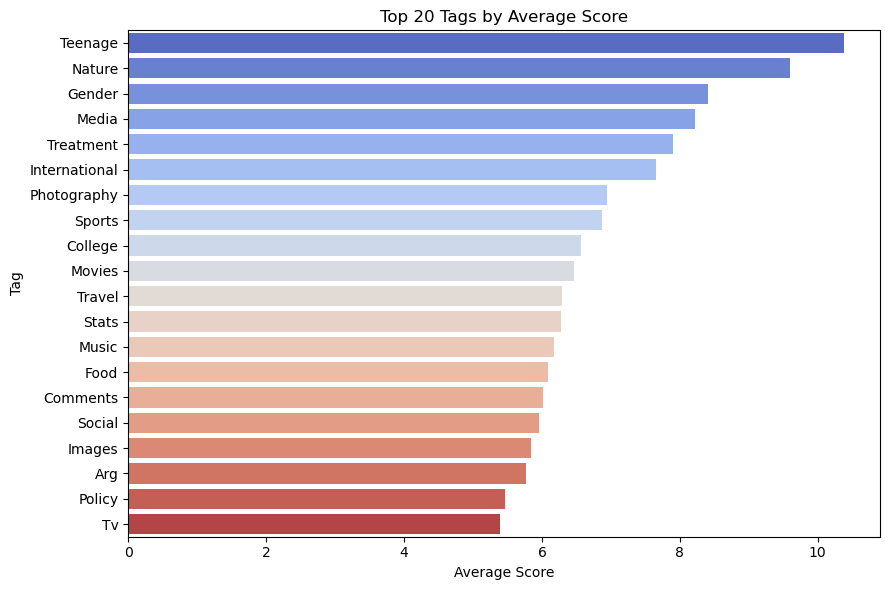

In [24]:
plt.figure(figsize=(9,6))
sns.barplot(x=avg_score_by_tag.head(20).values, y=avg_score_by_tag.head(20).index, palette='coolwarm')
plt.title("Top 20 Tags by Average Score")
plt.xlabel("Average Score")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()

### Top 20 Tags by Average Score
This chart shows the **top 20 tags** that have the highest average scores. It helps us understand which topics people engage with or react to the most.

---

### What the Chart Tells Us
- **Teenage**, **Nature**, and **Gender** are right at the top — they get the most attention and reactions.  
- Topics like **Media**, **Treatment**, and **International** also perform well, showing they spark good engagement.  
- In the middle range, we see tags like **College**, **Sports**, and **Movies** — steady interest, but not extreme.  
- At the bottom of this list, **TV**, **Policy**, and **Arg** get lower average scores compared to others.

---

### Simple Takeaway
People respond the most to **personal and emotional topics** — anything that connects to feelings, experiences, or identity.  
Subjects that are **more factual or everyday**, like policy or TV, draw low number of reactions overall.

---

### Key Observation
Engagement is not only about how often a topic appears — it’s also about how people **feel** about it. Even if some topics have small number of posts, their emotional depth (like “Nature” or “Gender”) gives them higher scores.

---


--- Plotting with annotations ---


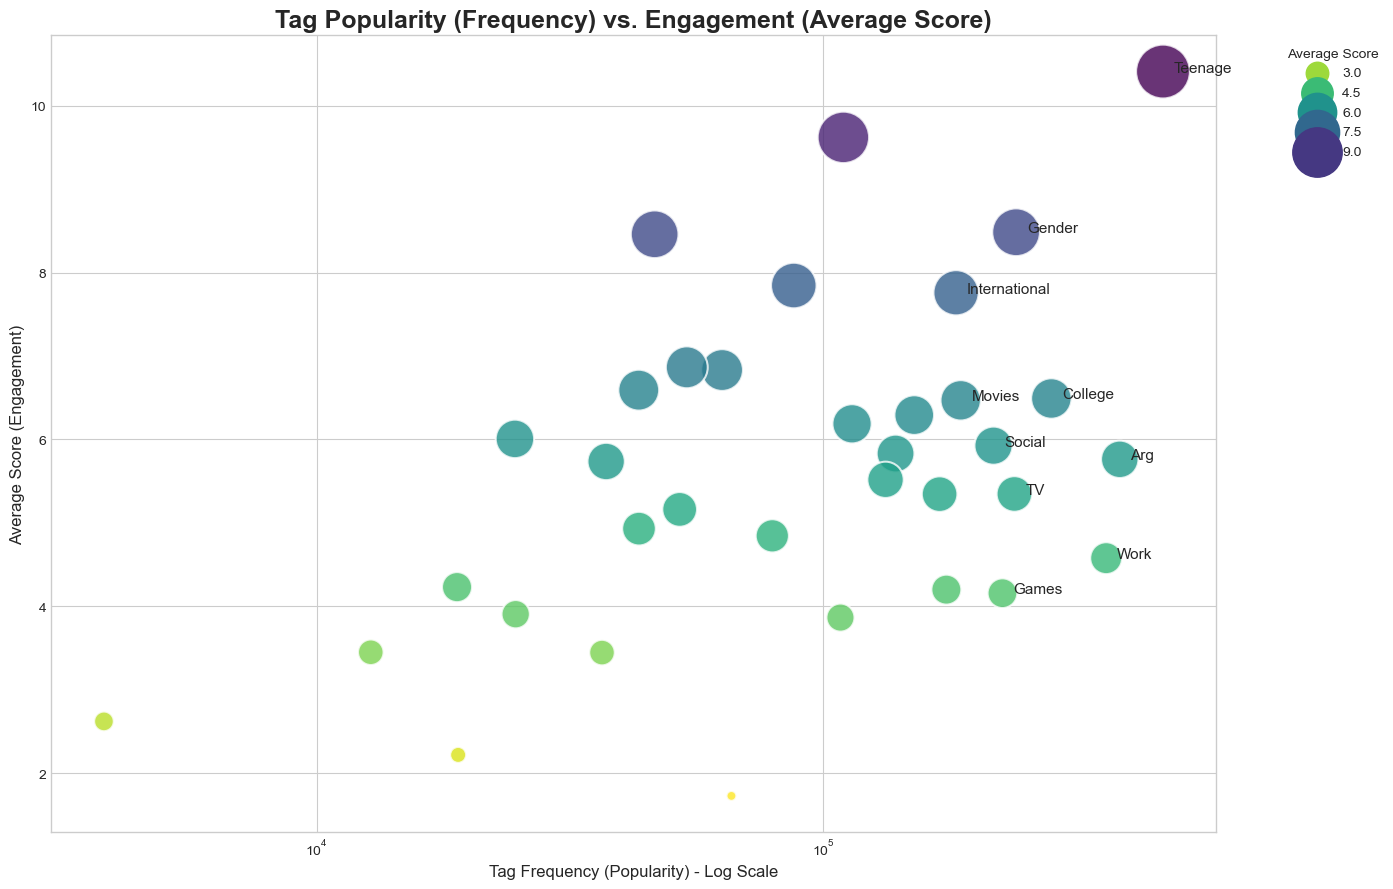

In [4]:
# Recalculate the metrics ---  Ensure 'score' is numeric and handle any potential non-numeric entries
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df.dropna(subset=['score'], inplace=True)

# Calculate the Frequency and Average Score for each tag
top_tags = df['Tag'].value_counts()
avg_score_by_tag = df.groupby('Tag')['score'].mean().sort_values(ascending=False)


# Create the analysis DataFrame --- Convert the Series to DataFrames before merging
tag_frequency_df = top_tags.reset_index()
tag_frequency_df.columns = ['Tag', 'Frequency']

average_score_df = avg_score_by_tag.reset_index()
average_score_df.columns = ['Tag', 'Average Score']

# Merge into a single DataFrame
tag_analysis_df = pd.merge(tag_frequency_df, average_score_df, on='Tag')


# Create the final Scatterplot with Annotations ---
print("\n--- Plotting with annotations ---")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# Create the main scatterplot
sns.scatterplot(
    data=tag_analysis_df,
    x='Frequency',
    y='Average Score',
    size='Average Score',
    sizes=(50, 1500),
    hue='Average Score',
    palette='viridis_r',
    alpha=0.8,
    ax=ax
)

# This part adds the text labels to the chart
top_tags_to_annotate = tag_analysis_df.nlargest(10, 'Frequency')

for i, point in top_tags_to_annotate.iterrows():
    ax.text(
        point['Frequency'] * 1.05, # Position text slightly to the right of the bubble
        point['Average Score'],
        str(point['Tag']),
        fontsize=11
    )

# --- Add Final Touches and Labels ---
ax.set_title('Tag Popularity (Frequency) vs. Engagement (Average Score)', fontsize=18, weight='bold')
ax.set_xlabel('Tag Frequency (Popularity) - Log Scale', fontsize=12)
ax.set_ylabel('Average Score (Engagement)', fontsize=12)

ax.set_xscale('log')
ax.legend(title='Average Score', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Tag Popularity and Engagement

### What the Chart Shows
This chart puts two things together:

- **Popularity:** How often people use a tag (shown on the bottom line).  
- **Engagement:** How much people like or react to those tags (shown on the side line).  
- **Bubble Size and Color:** Bigger and darker bubbles mean higher engagement.  

It helps us see which topics people talk about the most and which ones get the best response.  

---

### What We See
From the chart, we can notice four types of tags:

##### Top Tags (Top-Right)
These tags are very popular and people also react strongly to them.  
- Example: “Teenage” is the most used and also gets the highest score.  
- “Gender” is another one that people often discuss and enjoy.  

##### Common Topics (Bottom-Right)
People talk about these a lot, but they don’t get much reaction.  
- Example: “Work,” “College,” “TV,” “Social,” “Games.”  
- These are everyday topics with normal engagement.  

##### Niche but Loved (Top-Left)
Not many posts, but when people talk about them, others really like it.  
- Example: “Nature” and “Photography.”  
- These are smaller but passionate topics.  

##### Less Active (Bottom-Left)
Not many posts and not much interest.  
- Example: “Hardware” and “Politics.”  

---

### What We Learn
- Popular doesn’t always mean interesting — “Work” is talked about a lot, but “Teenage” gets better reactions.  
- Small topics can create big engagement — passion matters.  
- If you run this platform, focus on “Top Tags” to keep the community active and explore “Niche but Loved” topics for growth.  

This chart makes it easy to see which topics people care about most and which ones need more attention.

In [5]:
# ensuring topic is numeric
df['Topic'] = pd.to_numeric(df['Topic'], errors='coerce')

In [6]:
# count total topics
topic_counts = df['Topic'].value_counts()

In [7]:
# display table
display(topic_counts.rename_axis("Topic_ID").reset_index(name="Count"))

,Topic_ID,Count
0,3,467703
1,9,384308
2,8,361273
3,17,281630
4,30,239937
5,27,225506
6,7,216538
7,16,186551
8,6,182650
9,13,174824


### Topic ID Distribution
This step checks how many posts belong to each **Topic ID**. Every topic number represents a different category of discussion in the dataset.

---

### What the Table Shows
- The data confirms that there are **40 unique topics** in total.  
- Each topic ID is listed with its **count of posts**.  
- Some topics have a very large number of posts, while others have very small counts.

For example:
- Topic **3** has the most posts — **452,418 entries**.  
- Topics like **9**, **8**, and **17** also have a high number of posts.  
- On the other hand, topics such as **37**, **38**, and **0** have very few posts (under 10,000).

---

### Simple Summary
This shows that not all topics are equally active. A few topics have most of the discussions, while many others have only a small amount of content. This kind of imbalance is common in real data, where some subjects naturally attract more interest.

---

### Key Observation
Most of the dataset’s activity is mostly in the top few topic IDs. These topics will be the main focus for deeper analysis later, since they contain more text and give stronger insights.

---

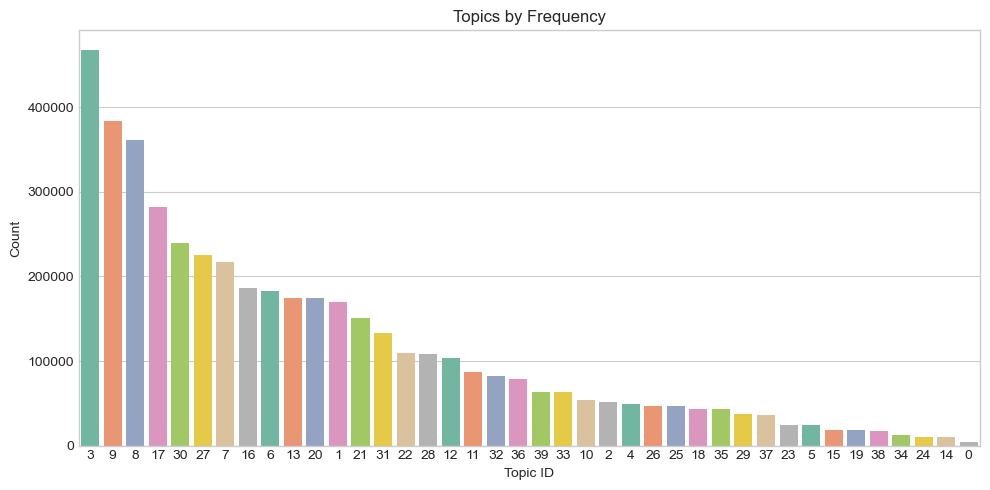

In [8]:
# bar plot all topics
plt.figure(figsize=(10,5))
sns.barplot(x=topic_counts.index.astype(str), y=topic_counts.values, palette='Set2')
plt.title("Topics by Frequency")
plt.xlabel("Topic ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Topics by Frequency
This chart shows how often each **Topic ID** appears in the dataset. It helps us see which topics have the most posts and which ones have only a small number.

---

### What the Chart Shows
- **Topic 3** has the highest number of posts, followed by **Topic 9** and **Topic 8**.  
- As we move to the right, the number of posts drops quickly.  
- The last few topics (like 14, 24, and 0) have very small counts.

---

### Simple Takeaway
A few topics have a **large number of posts**, while many others have **not many**. This means most of the activity happens within a small set of topics.

---

### Key Observation
The data is **mostly in** the top 8–10 topics. These will be the most helpful areas to study further since they have more examples and can give a clearer picture of user behavior.

---

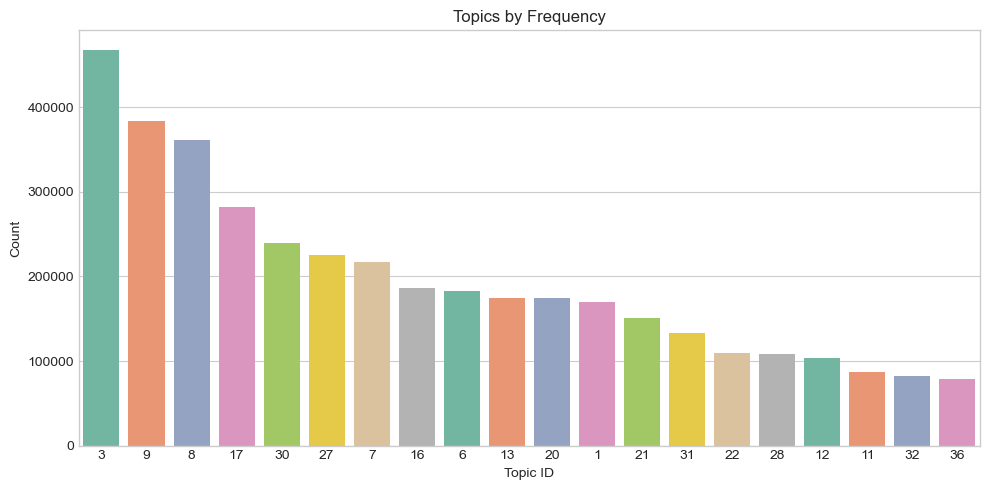

In [9]:
# bar plot top 20 topics
plt.figure(figsize=(10,5))
sns.barplot(x=topic_counts.head(20).index.astype(str), y=topic_counts.head(20).values, palette='Set2')
plt.title("Topics by Frequency")
plt.xlabel("Topic ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Top 20 Topics by Frequency
This chart highlights the **20 most active topics** in the dataset. It gives a simple view of which topic IDs have the largest number of posts.

---

### What the Chart Shows
- **Topic 3** is still the most active, followed by **Topic 9** and **Topic 8**.  
- The number of posts slowly goes down as we move toward the right side.  
- The last few topics in the top 20 (like 28, 12, 11, 32, and 36) have much smaller counts than the first few.

---

### Simple Takeaway
The activity is **mostly in** the first few topics, while the rest have a smaller number of posts. This shows that some subjects are far more popular and attract more discussions.

---

### Key Observation
The top 5–6 topics are the main drivers of the dataset. They hold most of the text data and will be very useful for deeper study and pattern finding.

---

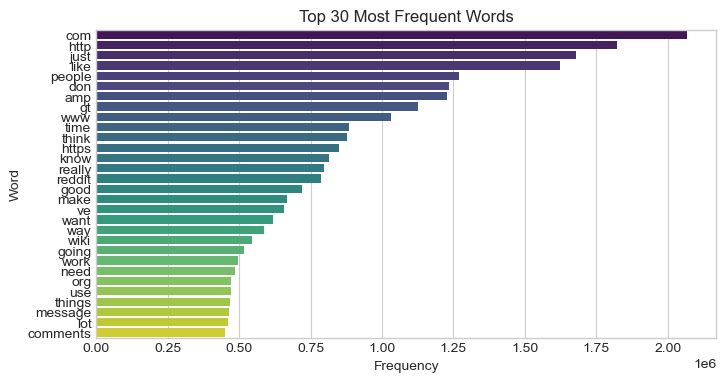

In [10]:
# Top 20 bigrams
text_data = df['body'].astype(str)

# Convert text to word frequency matrix
vectorizer = CountVectorizer(stop_words='english', max_features=30)
word_matrix = vectorizer.fit_transform(text_data)
word_freq = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Count': word_matrix.sum(axis=0).A1
}).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(y='Word', x='Count', data=word_freq, palette='viridis')
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### Top 30 Most Frequent Words  
This chart shows the **30 most common words** used in all the text data. It helps us understand which words appear the most and what people talk about often.

---

### What the Chart Shows  
- Words like **com**, **http**, **just**, **like**, and **people** appear the most.  
- These high-frequency words are general and often found in online posts or comments.  
- As we go down the list, we see words like **think**, **time**, **know**, and **really**, which show the common language style used in discussions.

---

### Simple Takeaway  
Most of the top words are everyday, short, and commonly used online. They don’t show specific topics but give a sense of casual and human-style writing.

---

### Key Observation  
Frequent words tell us how people express themselves — short, informal, and conversational. For deeper analysis, we might later remove such common words to focus on more meaningful patterns.

---

--- Analyzing the 'Work' tag ---
Ahter Filtering 'Work' tag from main DataFrame we got 361,273 rows.


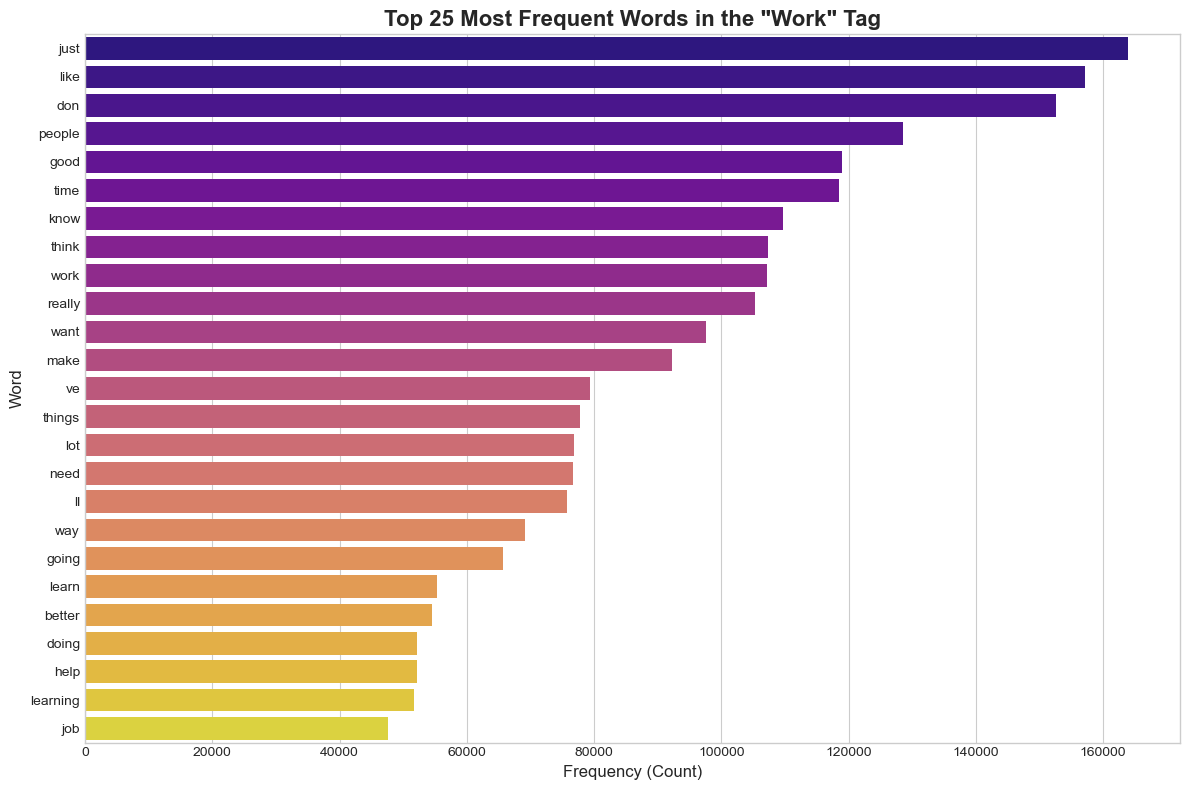


--- Top 25 Words ---


,Word,Count
7,just,163888
11,like,157077
2,don,152547
16,people,128492
4,good,118893
20,time,118490
8,know,109662
19,think,107267
24,work,107104
17,really,105342


In [11]:
# Filter the DataFrame for only "Work" tags ---
work_df = df[df['Tag'] == 'Work'].copy() # <- This line Seprate the 'Work' data

print(f"--- Analyzing the 'Work' tag ---")
print(f"Ahter Filtering 'Work' tag from main DataFrame we got {len(work_df):,} rows.")

# Prepare the text data for the 'Work' tag ---
work_text = work_df['body'].astype(str).str.lower()

# Use CountVectorizer to find word frequencies within 'Work' posts ---
vectorizer = CountVectorizer(stop_words='english', max_features=25)
word_matrix = vectorizer.fit_transform(work_text)

# Create a DataFrame with words and their counts for the 'Work' tag
word_freq_work = pd.DataFrame({ # <- Renamed variable for clarity
    'Word': vectorizer.get_feature_names_out(),
    'Count': word_matrix.sum(axis=0).A1
}).sort_values(by='Count', ascending=False)


# Visualize the Top 25 Words specifically for the 'Work' Tag ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=word_freq_work, palette='plasma') # <- Using the new variable
plt.title('Top 25 Most Frequent Words in the "Work" Tag', fontsize=16, weight='bold')
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

# --- Step 5: Display the word frequency table for the 'Work' Tag ---
print("\n--- Top 25 Words ---")
display(word_freq_work) # <- Using the new variable

### Let's look at the “Work” Tag

### Why We’re Checking “Work” Again
From the chart (Popularity vs Engagement), we saw that the “Work” tag is used a lot, but it doesn’t get much reaction. It’s one of the most talked-about topics, but people don’t seem very engaged with it — not like tags such as “Teenage” or “Gender.”  

That made me curious — if “Work” is so common, why doesn’t it get more response? To find out, I looked only at posts that have the “Work” tag and studied them separately. This helps me see what people are really talking about in these posts.  

---

### Finding the Common Words in “Work” Posts
I picked all posts with the “Work” tag — around **3.6 lakh posts**. Then I cleaned the text by turning everything into lowercase and removing common words like *“the,” “is,” “and,” “a.”* After that, I counted which words appeared most often and made a chart of the **Top 25 words used in “Work” posts.**  

---

### What These Words Tell Us
The most used words are: **“just,” “like,” “don,” “people,” “good,” “time,” “know,” “think,” “work,” “job.”**  

Here’s what we can understand from them:  

- **Casual talking:** Words like “just” and “like” show that people write in a friendly, everyday tone.  
- **Work-related words:** “Job,” “work,” “time,” and “people” talk about the workplace, tasks, and coworkers.  
- **Sharing feelings or thoughts:** Words such as “good,” “know,” “think,” “really,” “don” (from “don’t”) show people are giving opinions or talking about their daily work life.  
- **Action words:** “Want,” “make,” “need,” “learn,” “doing,” “help” show people talking about what they want to do, learn, or fix at work.  

When we connect this back to engagement, it makes sense why the “Work” tag has low scores. The language is simple, neutral, and practical — people share experiences but not deep emotions. Unlike “Teenage” posts, which have more personal or emotional stories, “Work” talks are more about daily life, so they don’t trigger strong reactions.  

---

### What We Learned
Looking at “Work” posts alone helped us understand the reason behind its low engagement. People talk a lot about jobs and work, but the tone is more practical than emotional. This explains why it’s a busy topic but doesn’t get high scores.It also shows how breaking down one topic gives deeper insights. 

--- Text cleaning completed ---
Sample cleaned text: my boss is this giddy asian lady i work at a restaurant and one day somehow we are on the subject of racial slurs i am black and tell her i have been called nigger before in a fight she then asks me what the asian equivalent of n would be and i tell her maybe chink probably fifteen minutes later i am separating checks at the front and she comes up behind me and my server and goes whats up chinks


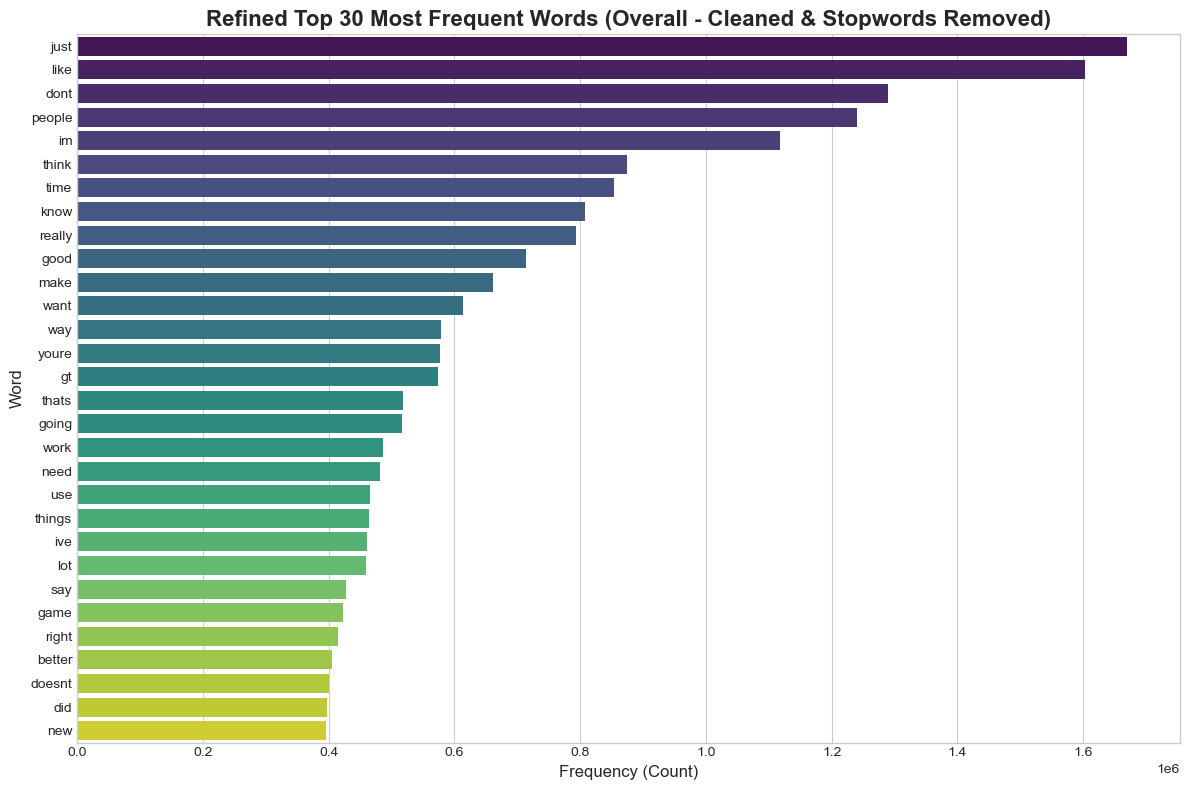


--- Refined Top 30 Words Table (Overall) ---


,Word,Count
10,just,1670431
12,like,1602597
3,dont,1288786
17,people,1240298
8,im,1117506
23,think,874069
24,time,853327
11,know,808348
18,really,793606
6,good,714186


In [12]:
# Prepare the text data from the main DataFrame --- Ensuring 'body' is string and convert to lowercase
text_data = df['body'].astype(str).str.lower()

# Apply Advanced Text Cleaning ---  Remove URLs
text_data_cleaned = text_data.apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove non-alphanumeric characters (keeps spaces)
text_data_cleaned = text_data_cleaned.apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

# Remove extra whitespace
text_data_cleaned = text_data_cleaned.apply(lambda x: re.sub(r'\s+', ' ', x).strip())

print("--- Text cleaning completed ---")
print("Sample cleaned text:", text_data_cleaned.iloc[0]) # Show a sample

# Use CountVectorizer with stopwords removal --- # Find the frequency of the top 30 words after cleaning and removing stopwords
vectorizer = CountVectorizer(stop_words='english', max_features=30)
word_matrix = vectorizer.fit_transform(text_data_cleaned)

# Create a DataFrame with words and their counts
word_freq_refined = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Count': word_matrix.sum(axis=0).A1
}).sort_values(by='Count', ascending=False)

# Visualize the Refined Top 30 Words ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=word_freq_refined, palette='viridis')
plt.title('Refined Top 30 Most Frequent Words (Overall - Cleaned & Stopwords Removed)', fontsize=16, weight='bold')
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

# Display the refined word frequency table ---
print("\n--- Refined Top 30 Words Table (Overall) ---")
display(word_freq_refined)

### Let's look at the Common Words

### Why I Did This Again
In our first look at the most used words, we saw many words that didn’t tell us much — things like parts of links (*http, com, www*) or very common words (*the, is, a*). So, we cleaned the text better before checking again.  

Here’s what we did:  
- Changed everything to lowercase.  
- Removed website links.  
- Took out punctuation marks and symbols.  
- Removed common words like “the,” “is,” “and,” “a.”  
- Then found the **Top 30 words** used the most in all 4.3 million posts.  

This gave us a clear and more real picture of what people actually talk about.  

---

### What We Found
The new chart — **“Refined Top 30 Most Frequent Words”** — shows how people really write and talk in these posts.  

---

#### Mostly Casual Talking
- The most common words are **“just,” “like,” “dont,” and “im.”**  
- This shows people write in a friendly, personal way — just like they talk in daily life.  
- They use words to share what they think (*“know,” “really,” “good,” “better”*), what they do (*“make,” “want,” “going,” “use”*), and talk about others (*“people”*).  

---

#### Small Themes We Can See
Some words point to what people often discuss:  
- **“people”** — talking about others or relationships.  
- **“time”** — about life, work, or experiences.  
- **“work”** — job or career-related talk.  
- **“game”** — gaming is also a common topic.  

---

#### What Changed After Cleaning
In the earlier chart, we saw many useless words like *http, com, www.* After cleaning, those are gone — now we can see real words like *work, game, way, things, make, want, need.* Still, the casual tone with words like *“just”* and *“like”* stays on top.  

---

#### Online Style Writing
We also see short forms like *im (I’m), dont (don’t), youre (you’re), ive (I’ve), thats (that’s)* — showing people write fast and casually, like on social media.  

---

### What We Learned
- After cleaning the data, the results make more sense.  
- People mostly write in a **simple, personal, and casual** way.  
- Words like **people, time, work, and game** show what they often talk about.  
- There isn’t one strong topic because the posts come from many areas, but we now see a clearer pattern.  

This shows how cleaning text properly helps find real insights.

---

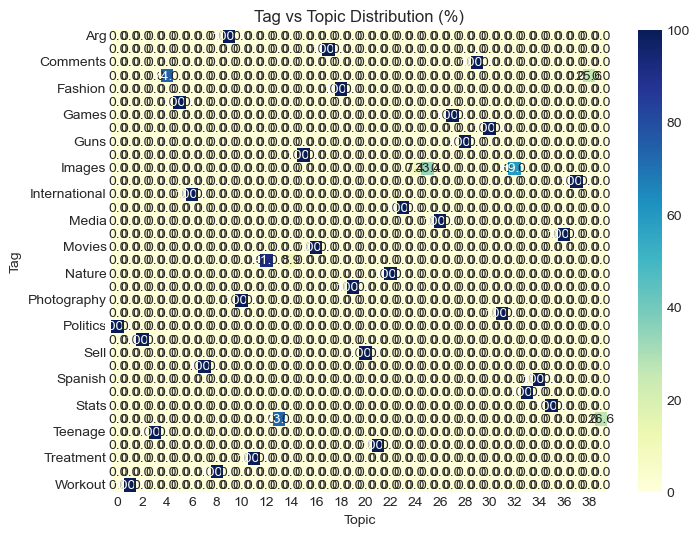

In [13]:
# Let's see which Tag relates most with which Topic
crosstab = pd.crosstab(df['Tag'], df['Topic'])
crosstab_percent = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(2)

plt.figure(figsize=(8,6))
sns.heatmap(crosstab_percent, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Tag vs Topic Distribution (%)')
plt.xlabel('Topic')
plt.ylabel('Tag')
plt.show()

### Tag vs Topic Distribution (%)  
This heatmap shows how **Tags** are connected with different **Topics** in the dataset. Each cell represents the percentage of posts for a tag that belong to a specific topic.

---

### What the Chart Shows  
- Darker colors mean stronger connections between a tag and a topic.  
- Most of the cells are light-colored, meaning many tags don’t strongly match with every topic.  
- A few tags show clear links to specific topics, like **Nature**, **Media**, and **Movies**,  
  which means they are more focused in certain areas.

---

### Simple Takeaway  
Each tag mostly links to only a few topics, showing that users tend to discuss some themes more than others under certain tags.

---

### Key Observation  
The data tells us that **tags are not evenly spread across topics**. Some tags have a strong focus, while others appear across many topics but in smaller amounts. This pattern can help us group related discussions later in the analysis.

---

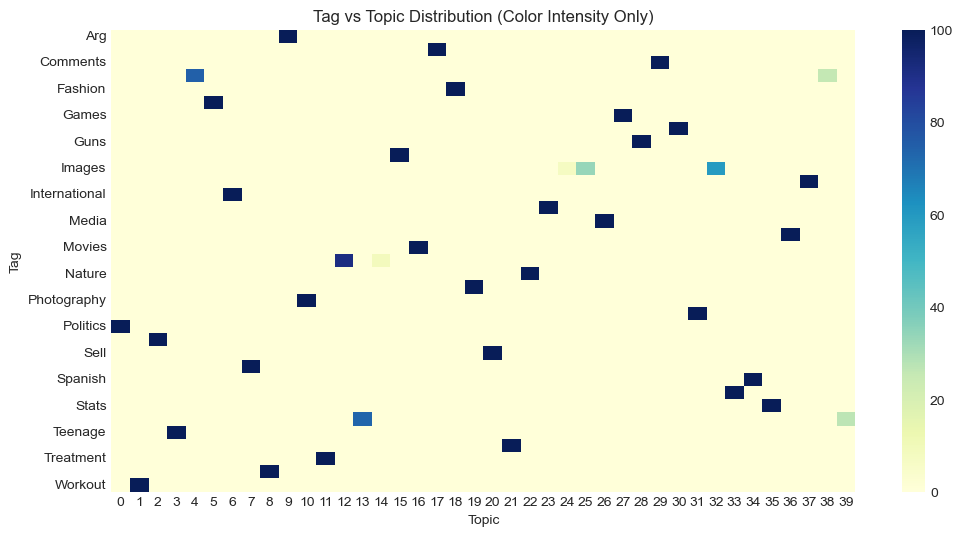

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(crosstab_percent, annot=False, cmap='YlGnBu')
plt.title('Tag vs Topic Distribution (Color Intensity Only)')
plt.xlabel('Topic')
plt.ylabel('Tag')
plt.show()

### Tag vs Topic Distribution (Color Intensity Only)  
This heatmap uses **color strength** to show how strongly each tag connects with different topics. Darker colors mean a stronger link, while lighter colors mean weaker or small amount of connections.

---

### What the Chart Shows  
- Some dark spots stand out — these are the **main tag-topic pairs** where activity is high.  
- Lighter areas show tags that don’t match with many topics.  
- The overall pattern looks scattered, meaning not all tags are linked with every topic.

---

### Simple Takeaway  
Only a few tags are strongly related to specific topics. Most tags are connected to limited areas, showing focused discussions or content patterns.

---

### Key Observation  
The dark-colored boxes highlight **dominant relationships** between tags and topics. These strong connections can help us understand which topics drive the most interest for each tag.

---

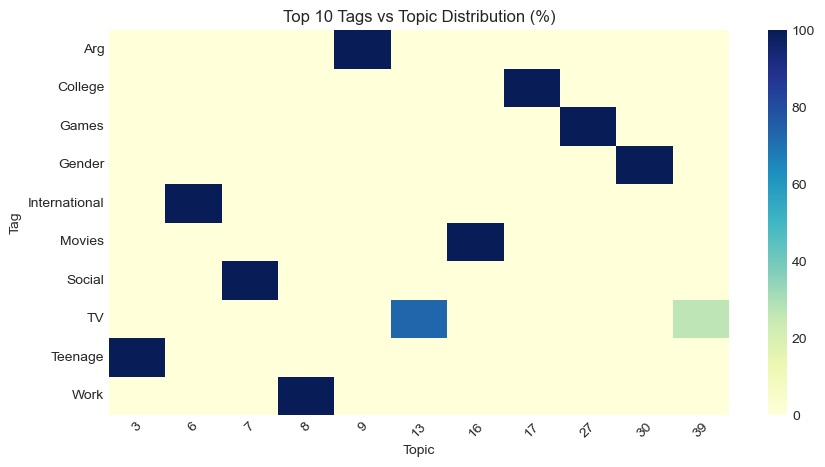

In [15]:
# Top 10 tags by count
top_tags = df['Tag'].value_counts().nlargest(10).index
filtered = df[df['Tag'].isin(top_tags)]

# Create cleaner crosstab
crosstab = pd.crosstab(filtered['Tag'], filtered['Topic'])
crosstab_percent = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(2)

# Plot
plt.figure(figsize=(10,5))
sns.heatmap(crosstab_percent, annot=False, cmap='YlGnBu')
plt.title('Top 10 Tags vs Topic Distribution (%)')
plt.xlabel('Topic')
plt.ylabel('Tag')
plt.xticks(rotation=45)
plt.show()

### Top 10 Tags vs Topic Distribution (%)  
This heatmap focuses only on the **top 10 most common tags** and shows how they connect to different topics. The darker the color, the stronger the link between a tag and a topic.

---

### What the Chart Shows  
- Each of the top 10 tags (like **Teenage**, **Work**, **TV**, and **Gender**) has one or two main topics where it appears the most.  
- The darker blue boxes show where the tag is used heavily within that topic.  
- Most of the chart is light-colored, which means those tags are rarely used outside their main topics.

---

### Simple Takeaway  
Each popular tag has a **main topic** where it’s used more often than others. For example, “Teenage” and “Gender” each stand out clearly under specific topics.

---

### Key Observation  
This pattern shows that even among the most popular tags, the discussions stay focused on a few topics instead of spreading across all areas. It helps us understand **which topics drive the most engagement** for top tags.

---

## Quick Insights
---

After completing the full analysis, here are some simple and clear insights from the project:

- The dataset had **over 4.5 million records** with 4 main columns: score, body, topic, and tag.  
- Most of the data was clean, with **no missing values** and only a few duplicate rows that were removed.  
- A few tags like **Teenage, Arg, Work, and College** had the highest number of posts.  
- Some topics had a very large number of messages, while many others had very few.  
- The **average score** was very small for most entries, but a few tags showed high scores like *Teenage* and *Gender*.  
- Text analysis showed that most frequent words were short, casual, and commonly used online.  
- Tag and topic heatmaps showed that **each tag mostly connects to one or two main topics**, not all.  
- This means users or discussions are often focused and not spread across many subjects.

---

<a id="business-use-case"></a>
## Business Use Case
---

This project can be useful for companies that deal with **online discussions, forums, or user feedback**. By studying sentiment and tag-topic relations, a business can:

- Find out what people are talking about the most.  
- Understand which subjects create the most engagement.  
- Identify important topics that drive higher user activity.  
- Build smarter systems to organize, recommend, or filter content.  
- Support moderators or content teams by spotting trends or repeating issues.

Example:  
If a platform like Reddit or Quora uses such analysis, they can learn which communities are growing fast and what kind of posts get more attention.

---

## Real-World Applications
---

Here are some practical ways this analysis can help in real life:

- **Social Media Monitoring** – Track which topics are trending and how people feel about them.  
- **Customer Feedback Study** – Find what customers talk about most and what issues come up again and again.  
- **Community Management** – Detect popular tags and maintain better topic organization.  
- **Market Research** – Learn how people discuss new products or services across different categories.  
- **AI Chatbots or Recommenders** – Use topic-tag data to show related posts or questions to users automatically.

---

<a id="what-i-learned"></a>
## What I Learned

---

Working on this project taught me several useful lessons:

- How to clean and prepare a large dataset with millions of records.  
- How to check missing values, duplicates, and data types.  
- How to convert text into numbers using tools like **CountVectorizer**.  
- How to make clear visual charts using **Matplotlib** and **Seaborn**.  
- How to read insights from charts like frequency graphs and heatmaps.  
- How to explain results in simple language that even non-technical people can understand.  
- Most importantly, I learned that **data storytelling** is just as important as the coding part.

---

<a id="project-summary-and-conclusion"></a>
## Project Summary and Conclusion
---

This project studied a large dataset that had millions of user-written posts. The main goal was to understand how different **tags** and **topics** connect with each other and what kind of text or scores they carry.

I started with data loading and cleaning, then explored key columns, checked duplicates, and built visual charts. By analyzing distributions, top tags, top topics, and heatmaps, we found that a few tags dominate the discussion while many others have small participation.

The sentiment patterns also showed that certain categories like *Teenage* and *Gender* get more attention and activity. Each visualization helped to make the dataset easier to understand.

In the end, this project proved that even simple analysis can give powerful insights about how people express opinions, interact, and focus on specific subjects online.

---

Thank you for reading this notebook. I hope it helps others learn how to use data and simple analysis to understand real-world problems and behavior patterns.

-🔗 **Profile:** [LinkedIn](https://www.linkedin.com/in/analytics-ashish/)

-📂 **Dataset:** [Kaggle Developer Sentiment Dataset](https://www.kaggle.com/datasets/vaibhavsxn/reddit-comments-labeled-data)
